<a href="https://colab.research.google.com/github/munira-ds/Retail-Customer-Segmentation-KMeans/blob/main/Prodigy_infotech_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning intrn at Prodigy infotech

Task 2:Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

Author:MuniraAkash

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [11]:
customer_data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [12]:
print(customer_data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
customer_data = customer_data.dropna()

In [14]:
print(customer_data.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [3]:
np.random.seed(42)
data = pd.DataFrame({
    'CustomerID': range(1, 101),
    'TotalSpending': np.random.randint(100, 1000, 100),
    'NumPurchases': np.random.randint(5, 50, 100),
    'AveragePurchase': np.random.uniform(10, 100, 100)
})

In [4]:
features = ['TotalSpending', 'NumPurchases', 'AveragePurchase']
X = data[features]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

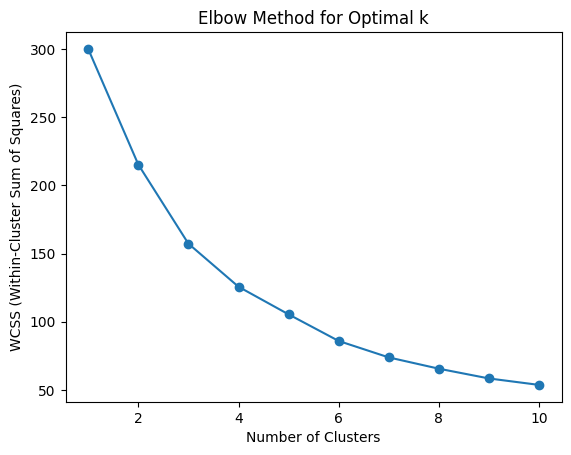

In [7]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [8]:
optimal_k = 3

In [9]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
print(data[['CustomerID', 'Cluster']])

    CustomerID  Cluster
0            1        0
1            2        2
2            3        1
3            4        1
4            5        2
..         ...      ...
95          96        0
96          97        2
97          98        1
98          99        1
99         100        0

[100 rows x 2 columns]
